<a href="https://colab.research.google.com/github/fauk74/Machine-Learning/blob/main/tensorflow_time_series_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forcasting fundamentals with Tensorflow  + Milestone project BitPredict 💰

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-93a8434c-2d9c-a22f-02de-419b4100d1af)


In [ ]:

# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-11-23 05:37:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-11-23 05:37:56 (7.43 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"],
               index_col=["Date"])

In [ ]:
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
len(df)

2787

In [ ]:
df["Closing Price (USD)"]

Date
2013-10-01      123.654990
2013-10-02      125.455000
2013-10-03      108.584830
2013-10-04      118.674660
2013-10-05      121.338660
                  ...     
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Closing Price (USD), Length: 2787, dtype: float64

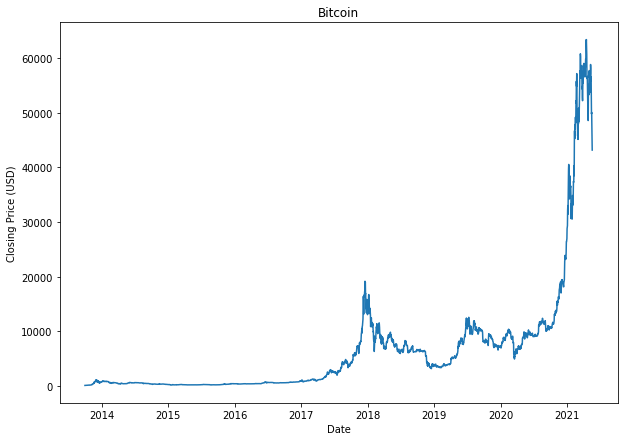

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Bitcoin")
sns.lineplot(x=df.index, y=df["Closing Price (USD)"])

In [ ]:
import pandas as pd
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

In [ ]:
import csv
from datetime import datetime


In [ ]:
timesteps=[]
btc_price=[]
with open ("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader=csv.reader(f, delimiter=",")
  next(csv_reader) # skip the first line
  for line in csv_reader:
    #timesteps.append(line[1])
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # get the dates as dates not strings
    btc_price.append(float(line[2])) #get the closing price as float

#view first 10 of each
timesteps[:10]





[datetime.datetime(2013, 10, 1, 0, 0),
 datetime.datetime(2013, 10, 2, 0, 0),
 datetime.datetime(2013, 10, 3, 0, 0),
 datetime.datetime(2013, 10, 4, 0, 0),
 datetime.datetime(2013, 10, 5, 0, 0),
 datetime.datetime(2013, 10, 6, 0, 0),
 datetime.datetime(2013, 10, 7, 0, 0),
 datetime.datetime(2013, 10, 8, 0, 0),
 datetime.datetime(2013, 10, 9, 0, 0),
 datetime.datetime(2013, 10, 10, 0, 0)]

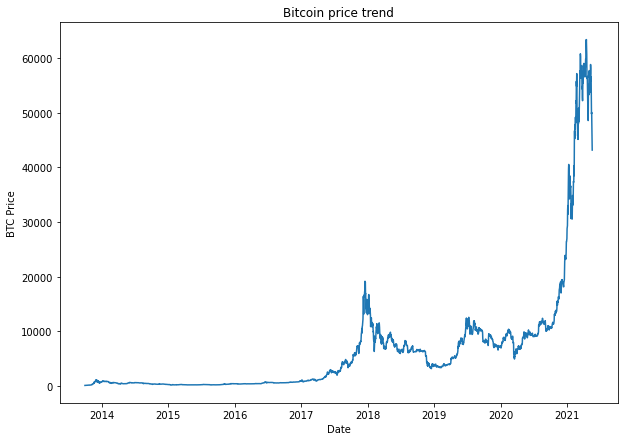

In [ ]:
#Plot from csv
import matplotlib.pyplot as plt
import numpy as np
plt.figure (figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.title("Bitcoin price trend")
plt.xlabel("Date");
plt.ylabel("BTC Price");

# Format data part1: Create train and test set 

In [ ]:
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()


In [ ]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [ ]:
#Wrong way to make train/test for time series data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(timesteps, prices, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

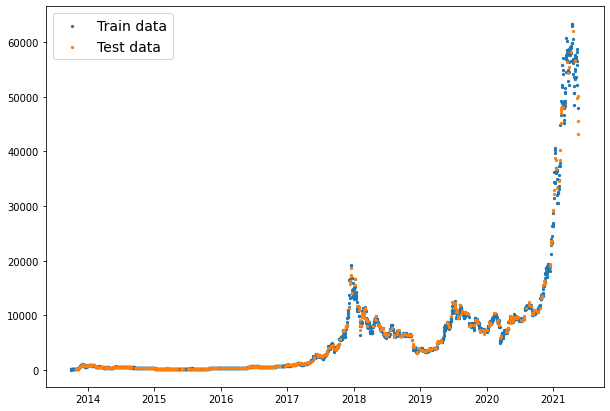

In [ ]:
# let's plot wrong train and test split

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.legend(fontsize=14)
plt.show()

In [ ]:
### Create train & test set (the right way)

split_size=int(0.8* len(prices))

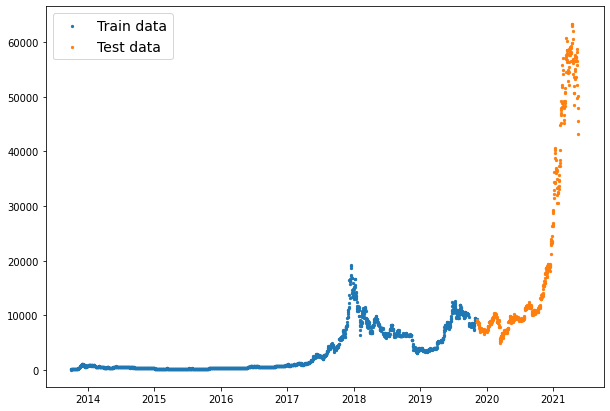

In [ ]:
X_train, y_train=timesteps[:split_size], prices[:split_size]
X_test, y_test= timesteps[split_size:], prices[split_size:]

# let's plot correct train and test split

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.legend(fontsize=14)
plt.show()


#  Create a plotting function

In [ ]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None, xlabel="X", ylabel="Y" ):
  """
  Plots timesteps ( aseries of points in time( as series of values across time))

  Parameters

  -------
  timesteps: array of timestep value
  values: array of values to plot
  formt: style of plot
  start: where to start
  end: where to end the plot 
  label: label to show on plot about values
  """

  
 # plt.figure(figsize=(10,7)) # if we add plt.figure it will start a new figure 
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  if label: 
    plt.legend(fontsize=14)
    plt.grid(True)


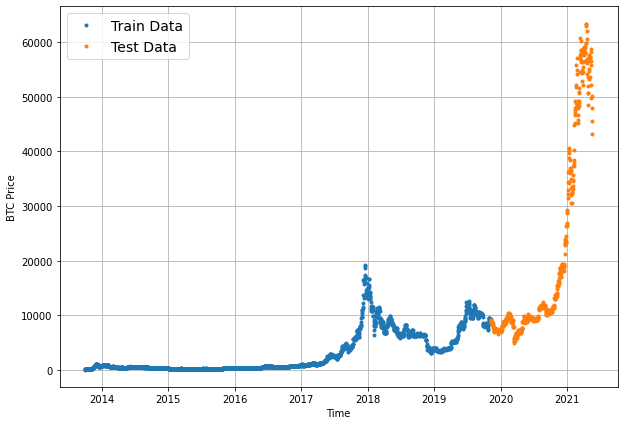

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train,   label="Train Data")
plot_time_series(timesteps=X_test, values=y_test,  label="Test Data",xlabel="Time", ylabel="BTC Price")

# Modelling Experiments



# Naive Method

$$\hat{y}_{t}=\hat{y}_{t-1}$$ *testo in corsivo*

In [ ]:
naive_forecast=y_test[:-1]
naive_forecast[:10], naive_forecast[-10:] # first ten, last ten 


(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

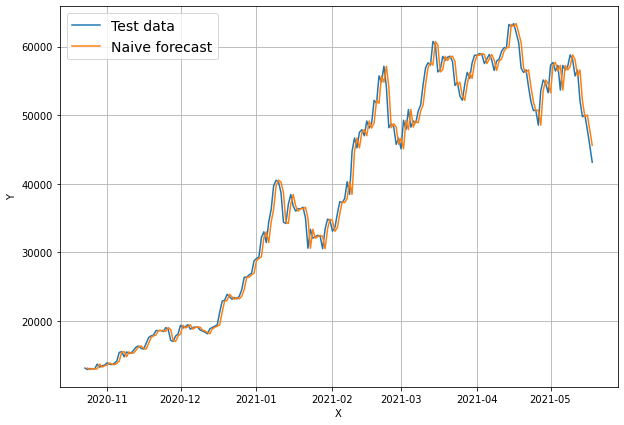

In [ ]:
#Plot naive forecast
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train,values=y_train,  label="Train data")
plot_time_series(timesteps=X_test,values=y_test,start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast, start=350, format="-", label="Naive forecast")

In [ ]:
import tensorflow as tf
#Implementing MASE

def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (no seasonality)
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

In [ ]:
A=[1,2,3,4,5,6,7,8,9,10]
B=A[1:]
B

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
A[:-1]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

# Evaluating a time series Model

In [ ]:
# Create a function to take in model prediction and truth values and return evaluation
def evaluate_preds(y_true, y_pred):
  y_true=tf.cast(y_true, dtype=tf.float32)
  y_pred=tf.cast(y_pred, dtype=tf.float32)

  mae=tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase=mean_absolute_scaled_error(y_true, y_pred)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

          

In [ ]:
naive_results=evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

# Format data: windowing

In [ ]:
#Let's set up global variables for window and horizon size
HORIZON= 1
WINDOW_SIZE=7


In [ ]:
#Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """Creates labels fow windowed dataset.
  E.g. if horizon= 1
  Input [0,1,2,3,4,5,6,7] - > Output ([0,1,2,3,4,5,6],[7])
  """
  return x[:, :-horizon] , x[:, -horizon:]


In [ ]:
test_window, test_label=get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))


In [ ]:
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
print(test_window, test_label)

tf.Tensor([[1 2 3 4 5 6 7]], shape=(1, 7), dtype=int32) tf.Tensor([[8]], shape=(1, 1), dtype=int32)


In [ ]:
btc_price[:20]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883]

https://numpy.org/doc/stable/reference/arrays.indexing.html

Our function will

1. Create a window stepo specific window size
2. Use Numpy indexing to create a 2D array of a multiple window steps
3. Uses the 2D array of multiple window steps from 2. to index a target series 
4. usses the get_labelled windows() function to turn the windows step into windows with a specified horizon

In [ ]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array ina 2D array of sequential labelled windows of window_size with horizon size labels
  """
  #1. create a windo o specific windows_size (ad the horizon on the ens for labelling later
  window_step= np.expand_dims(np.arange(window_size+horizon), axis=0)

  #2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T #create a 2d array of window size

  print(f"Window step:\n {window_step, window_step.shape}")
  print(f"Window indexes:\n {window_indexes, window_indexes.shape}")
  #3. Index on the target array
  windowed_array=x[window_indexes]
  #print(windowsed array)
  windows, labels=get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows,full_labels=make_windows(prices, WINDOW_SIZE, HORIZON)

Window step:
 (array([[0, 1, 2, 3, 4, 5, 6, 7]]), (1, 8))
Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


In [ ]:
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
#View the first 3 windows/labels
for i in range(3):
  print (f"Window:{full_windows[i]} -> Label: {full_labels[i]}")

Window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
full_windows[0]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [ ]:
#input_data = data[:-10]
#targets = data[10:]
dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    prices, prices[7:], sequence_length=7)


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [ ]:
dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    prices, None, sequence_length=7)

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """

  split_size=int(len(windows)* (1-test_split))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [ ]:
# Create train eand test 

train_windows, test_windows, train_labels, test_labels= make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
np.squeeze(train_labels[:5]).shape


(5,)

In [ ]:
#Check to see if train labels are the same (before and after window split)

np.array_equal(np.squeeze(train_labels[:-HORIZON-1]) , y_train[WINDOW_SIZE:])

True

# Make a modelling checkpoint callback

In [ ]:
# 

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
#Create a function to implement a Model ChckPoint with a specific filename

In [ ]:
import os
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), verbose=0, save_best_only=True)


#  Model 1: Dense model (window=7, horizon=1)


In [ ]:
import tensorflow as tf 
from tensorflow.keras import layers

tf.random.set_seed(42)
#1. Construct the model

model_1=tf.keras.Sequential([
  layers.Dense(128,activation="relu"),
  layers.Dense(HORIZON, activation="linear")]
  , name="model_1_dense")

#2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#3. Fit the model

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])



Epoch 1/100
18/18 [==============================] - 4s 62ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
Epoch 2/100
18/18 [==============================] - 1s 42ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 1s 42ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
Epoch 4/100
18/18 [==============================] - 1s 42ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
Epoch 5/100
18/18 [==============================] - 1s 42ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.7969 - val_loss: 895.2238 - val_mae: 895.2238 - val_mse: 2564574.0000
Epoch 6/100
18/18 [==============================] - 1s 43ms/step - loss: 158.5

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [ ]:
#Load in saved model and evaluate it on test data
model_1=tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
## Making forecasts with a model (on the test dataset)
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data
  """
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make prediction using model_1 
model_1_preds=make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [ ]:
model_1_results=evaluate_preds(y_true=test_labels,
                               y_pred=model_1_preds)

In [ ]:
model_1_results

{'mae': array([11928.926 , 11795.888 , 11974.973 , 11948.291 , 11954.367 ,
        12005.415 , 12095.945 , 12114.572 , 12074.428 , 12274.316 ,
        12328.175 , 12355.667 , 12659.419 , 12910.013 , 12878.642 ,
        13093.801 , 12949.451 , 13008.31  , 12720.616 , 12814.959 ,
        12581.028 , 12707.596 , 12820.859 , 12856.26  , 12869.686 ,
        12947.9375, 12808.817 , 12728.703 , 12714.616 , 12702.062 ,
        12856.509 , 12927.325 , 12960.656 , 12967.02  , 12928.015 ,
        13054.388 , 13032.3545, 13233.178 , 13509.825 , 12790.816 ,
        13002.815 , 13009.27  , 12891.536 , 12929.482 , 12987.103 ,
        12930.542 , 12948.686 , 12972.47  , 12937.092 , 12872.533 ,
        12818.354 , 12918.378 , 12975.585 , 12979.917 , 13169.244 ,
        12887.847 , 12853.176 , 12845.986 , 12591.279 , 12378.127 ,
        12360.248 , 12528.329 , 12347.684 , 12353.04  , 12309.104 ,
        12329.119 , 11962.124 , 11905.698 , 11974.917 , 11866.163 ,
        11859.346 , 12016.109 , 12007.852

In [ ]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [ ]:
model_1_preds2=np.expand_dims(model_1_preds, axis=1)

In [ ]:
model_1_preds2.shape


(556, 1)

In [ ]:
model_1_results=evaluate_preds(y_true=test_labels,
                               y_pred=model_1_preds2)

In [ ]:
test_labels.shape, model_1_preds2.shape

((556, 1), (556, 1))

In [ ]:
model_1_results

{'mae': array([6.36689453e+01, 3.11300781e+02, 3.04175781e+02, 3.46240234e+01,
        2.57119141e+01, 7.31396484e+01, 1.91306641e+02, 3.27929688e+01,
        7.63789062e+01, 3.10740234e+02, 1.40676270e+02, 3.39379883e+01,
        4.41563477e+02, 4.31680176e+02, 1.92626953e+01, 2.13831543e+02,
        1.18811035e+02, 3.02924805e+01, 3.85649902e+02, 8.41992188e+01,
        3.21763672e+02, 1.65383301e+02, 1.95572266e+02, 1.08100098e+02,
        4.17480469e+00, 1.13402832e+02, 1.73657227e+02, 1.57750977e+02,
        3.78593750e+01, 6.14501953e+00, 2.17536133e+02, 1.39478516e+02,
        5.61879883e+01, 5.16113281e-01, 4.83730469e+01, 1.33034180e+02,
        7.51855469e+00, 2.18143066e+02, 3.24016113e+02, 7.97648926e+02,
        1.20864746e+02, 9.37524414e+01, 1.23624512e+02, 3.67968750e+00,
        1.37759277e+02, 6.27929688e+01, 5.27587891e+00, 4.17270508e+01,
        3.81201172e+01, 9.72480469e+01, 8.08081055e+01, 1.30109375e+02,
        9.77480469e+01, 1.74980469e+01, 2.16074707e+02, 2

In [ ]:
test_labels_sq=tf.squeeze(test_labels)

In [ ]:
model_1_results=evaluate_preds(y_true=test_labels_sq,
                               y_pred=model_1_preds)
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

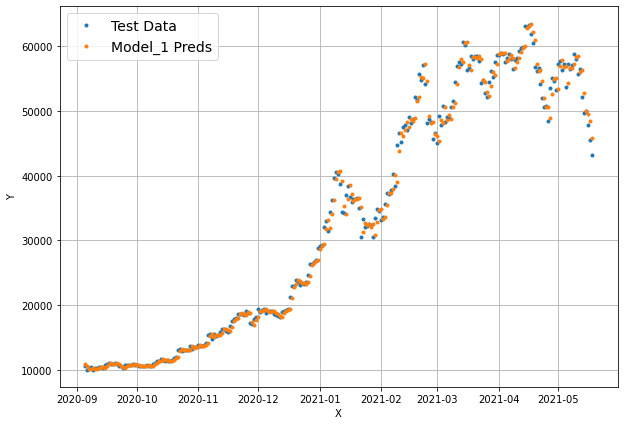

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, label="Model_1 Preds")

In [ ]:
### Read about AUTOREGRESSION

# Model 2: Dense (window=30, horizon=1)

In [ ]:
HORIZON=1
WINDOW_SIZE=30

In [ ]:
full_windows, full_labels=make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)


Window step:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]]), (1, 31))
Window indexes:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


In [ ]:
train_windows, test_windows, train_labels, test_labels=make_train_test_splits(windows=full_windows,
                                                                              labels=full_labels,
                                                                              test_split=0.2)

In [ ]:
train_windows[:3], test_windows[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

#1. Construct the model

model_2=tf.keras.Sequential([
  layers.Dense(128,activation="relu"),
  layers.Dense(HORIZON, activation="linear")]
  , name="model_2_dense")

#2. Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#3. Fit the model

model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
#Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [ ]:
model_2=tf.keras.models.load_model("model_experiments/model_2_dense/")

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [ ]:
model_2_preds=make_preds(model_2, input_data=test_windows)

In [ ]:
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mase': 1.0644706,
 'mse': 1281438.8,
 'rmse': 1132.0065}

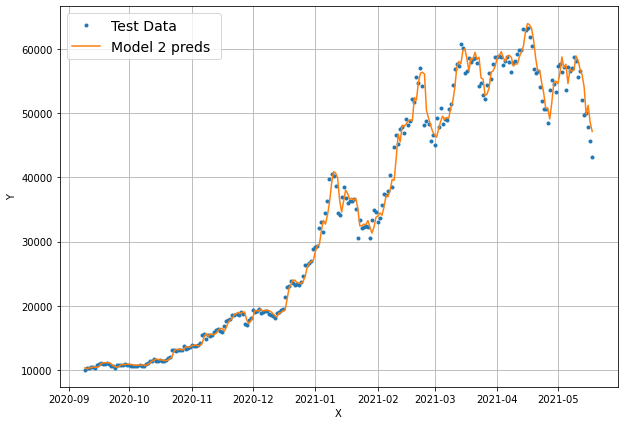

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.squeeze(test_labels), start=offset,label="Test Data") #test_labels[:,0] is the same
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, format='-', start=offset,label="Model 2 preds ")

In [ ]:
# NB test_labels[:,0] transform an array in a squeezed array

# Model 3 Dense window= 30 horizon = 7

In [ ]:
HORIZON=7
WINDOW_SIZE=30


In [ ]:
full_windows, full_labels=make_windows (prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36]]), (1, 37))
Window indexes:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels=make_train_test_splits(windows=full_windows, 
                                                                             labels=full_labels)
len(train_windows), len(test_labels), len(test_windows), len(test_labels)

(2200, 551, 551, 551)

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

tf.random.set_seed(42)

#Create model 3 

model_3=tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)], name="model_3_dense"
)

#COmpile

model_3.compile(loss="MAE", optimizer=tf.keras.optimizers.Adam())

#Fit

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)]
            )

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
#Evaluate  the model on the test data

model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1321.5201


1321.5201416015625

In [ ]:
model_3=tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1237.5065


1237.5064697265625

In [ ]:
#Make predictions 
model_3_preds=make_preds(model_3,
                         input_data=test_windows)

In [ ]:
model_3_preds

<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9004.693 ,  9048.1   ,  9425.088 , ...,  9495.798 ,  9558.451 ,
         9357.354 ],
       [ 8735.507 ,  8840.304 ,  9247.793 , ...,  9097.188 ,  9174.328 ,
         9156.819 ],
       [ 8672.508 ,  8782.389 ,  9123.8545, ...,  9007.13  ,  9003.87  ,
         9042.723 ],
       ...,
       [57262.957 , 57029.234 , 58613.023 , ..., 59392.875 , 59230.977 ,
        59006.95  ],
       [56652.637 , 56577.67  , 58621.79  , ..., 59585.344 , 58991.66  ,
        58491.164 ],
       [55739.14  , 56437.547 , 57434.598 , ..., 58472.17  , 57188.766 ,
        58150.625 ]], dtype=float32)>

In [ ]:
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_preds)
model_3_results

{'mae': array([ 513.60516 ,  355.08356 ,  327.17035 ,  358.50977 ,  420.53207 ,
         537.8537  ,  545.6606  ,  485.92307 ,  584.497   ,  687.3814  ,
         836.2266  ,  755.15704 ,  731.49567 ,  775.3398  ,  567.9548  ,
         266.80865 ,  188.80217 ,  188.10764 ,  253.09521 ,  301.43365 ,
         151.10742 ,  196.81432 ,  191.46184 ,  231.65074 ,  143.6114  ,
         122.59033 ,  132.78836 ,  190.81152 ,  179.1598  ,  228.25949 ,
         314.44022 ,  379.09283 ,  278.32553 ,  295.34598 ,  299.38525 ,
         248.6499  ,  299.7564  ,  259.6937  ,  180.30566 ,  206.72873 ,
         374.6289  ,  144.85135 ,  142.33601 ,  131.11559 ,   93.94057 ,
          54.825615,   73.79415 ,  103.59996 ,  121.33363 ,  168.67236 ,
         183.90945 ,  152.25307 ,  186.57121 ,  146.91301 ,  240.42961 ,
         351.00668 ,  540.9516  ,  549.15686 ,  521.2422  ,  526.85535 ,
         453.36307 ,  257.98166 ,  277.29492 ,  301.82465 ,  455.71756 ,
         458.9599  ,  503.44427 ,  522.3117 

In [ ]:
model_2_results["mae"].ndim

0

# Make our evaluation function work for larger horizons

In [ ]:
# Create a function to take in model prediction and truth values and return evaluation
def evaluate_preds(y_true, y_pred):
  y_true=tf.cast(y_true, dtype=tf.float32)
  y_pred=tf.cast(y_pred, dtype=tf.float32)

  mae=tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase=mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0: 
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse=tf.reduce_mean(rmse)
    mape=tf.reduce_mean(mape)
    mase=tf.reduce_mean(mase)

  return {"mae":  mae.numpy(),
          "mse":  mse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy(),
          "rmse": rmse.numpy()}

In [ ]:
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mape': 5.5588784,
 'mase': 2.2020736,
 'mse': 5405198.5,
 'rmse': 1425.7478}

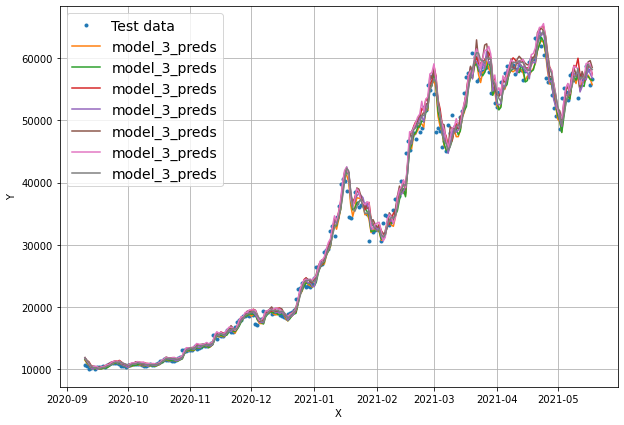

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0],start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_3_preds, format="-", start=offset, label="model_3_preds")

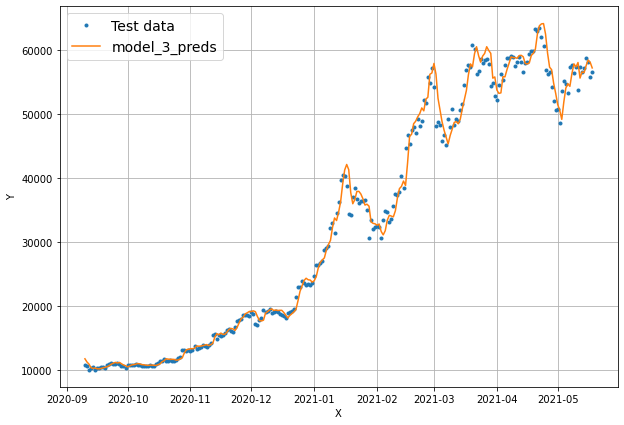

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0],start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds,axis=1), 
                 format="-", 
                 start=offset, 
                 label="model_3_preds")

In [ ]:
df=pd.DataFrame({"naive": naive_results,
                 "model_1": model_1_results,
                 "model_2": model_2_results, 
                 "model_3": model_3_results})
df=df.T
df

,mae,mse,rmse,mape,mase
naive,567.980225,1147547.00,1071.236206,2.516525,0.999570
model_1,568.951233,1171744.00,1082.471313,2.544898,0.999490
model_2,608.961487,1281438.75,1132.006470,2.769339,1.064471
model_3,1237.506348,5405198.50,1425.747803,5.558878,2.202074


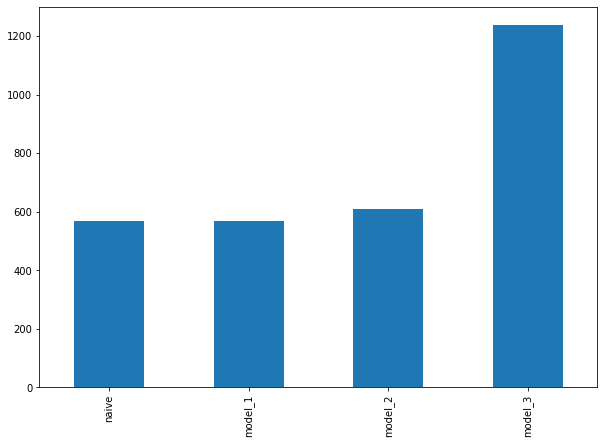

In [ ]:
df["mae"].plot(kind="bar", figsize=(10,7))

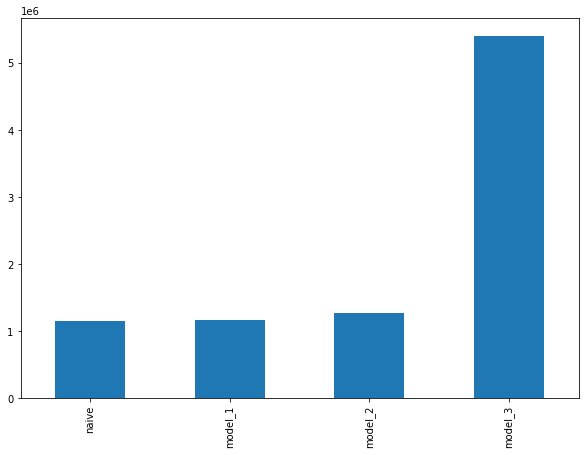

In [ ]:
df["mse"].plot(kind="bar", figsize=(10,7))

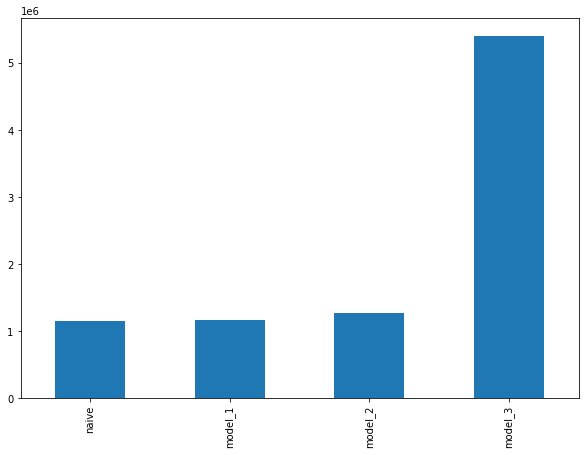

In [ ]:
df["mse"].plot(kind="bar", figsize=(10,7))

# Model 4: Conv 1D

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
full_windows, full_labels=make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 (array([[0, 1, 2, 3, 4, 5, 6, 7]]), (1, 8))
Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels=make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
# We need an input shape of 'batch size , timesteps, input dim

train_windows[0].shape

(7,)

# Lambda Layer to expand dims

In [ ]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer=layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with Expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with Expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


 Create the model 1D convolutional

In [ ]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
                             layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                             layers.Conv1D(filters=128,kernel_size=5, strides=1, padding="causal", activation="relu"),
                             layers.Dense(HORIZON)], name="model_4_conv1D")
#Compile
model_4.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

#Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)]
            )

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 610.1539


610.1538696289062

In [ ]:
model_4=tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8284


570.828369140625

In [ ]:
model_4_preds=make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.465, 8754.471, 8983.929, 8759.672, 8703.628, 8708.295,
       8661.668, 8494.84 , 8435.318, 8492.115], dtype=float32)>

In [ ]:

model_4_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_4_preds)
model_4_results

{'mae': 570.82837,
 'mape': 2.5593352,
 'mase': 1.0027874,
 'mse': 1176671.2,
 'rmse': 1084.7448}

# Model 5:RNN (LSTM)

In [ ]:
#Let's build an LSTM with Functional API


In [ ]:
inputs=layers.Input(shape=(WINDOW_SIZE))
x=layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x=layers.LSTM(128, return_sequences=True)(x)
x=layers.LSTM(128, activation="relu")(x)
#x=layers.Dense(32, activation="relu")(x)
output=layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

#Compile
model_5.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())


#Fit

model_5.fit(train_windows,
            train_labels, 
            epochs=100,
            verbose=1, 
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])



Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 2454.3845INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 5s 184ms/step - loss: 2335.2922 - val_loss: 9880.2461
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 949.4415 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 807.0569 - val_loss: 1118.6293
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 253.9110 - val_loss: 1281.7898
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 204.4162INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 157ms/step - loss: 203.8625 - val_loss: 1079.5022
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 196.2684INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 173ms/step - loss: 191.2978 - val_loss: 1068.3984
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 192.4570INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 157ms/step - loss: 191.5461 - val_loss: 1056.6630
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 187.4206 - val_loss: 1066.2435
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 184.6467 - val_loss: 1061.5988
Epoch 9/100
13/18 [====================>.........] - ETA: 0s - loss: 180.9314INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 152ms/step - loss: 182.6696 - val_loss: 1048.7314
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 177.0714INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 181.6111 - val_loss: 1029.8967
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 181.1658INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 174ms/step - loss: 181.1786 - val_loss: 1029.7880
Epoch 12/100
13/18 [====================>.........] - ETA: 0s - loss: 181.4642INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 157ms/step - loss: 179.8507 - val_loss: 1015.4171
Epoch 13/100
14/18 [======================>.......] - ETA: 0s - loss: 176.7840INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 152ms/step - loss: 177.4958 - val_loss: 1003.1680
Epoch 14/100
18/18 [==============================] - 0s 10ms/step - loss: 175.8761 - val_loss: 1024.5377
Epoch 15/100
18/18 [==============================] - 0s 11ms/step - loss: 175.3560 - val_loss: 1008.2181
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 172.8958INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 185ms/step - loss: 173.2440 - val_loss: 966.6474
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 171.8057 - val_loss: 1028.2844
Epoch 18/100
18/18 [==============================] - 0s 11ms/step - loss: 170.7999 - val_loss: 1023.2718
Epoch 19/100
18/18 [==============================] - 0s 11ms/step - loss: 169.2529 - val_loss: 1023.2585
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 170.2240INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 168.7919 - val_loss: 942.4572
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 165.8265INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 155ms/step - loss: 165.1443 - val_loss: 935.9726
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 170.7612INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 151ms/step - loss: 163.5979 - val_loss: 935.0870
Epoch 23/100
18/18 [==============================] - 0s 10ms/step - loss: 162.8252 - val_loss: 948.4776
Epoch 24/100
14/18 [======================>.......] - ETA: 0s - loss: 159.1763INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 175ms/step - loss: 160.1139 - val_loss: 926.3398
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 164.1984INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 158ms/step - loss: 158.8025 - val_loss: 892.9959
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 158.0013INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 157ms/step - loss: 156.7181 - val_loss: 891.3825
Epoch 27/100
18/18 [==============================] - 0s 11ms/step - loss: 155.5458 - val_loss: 895.8940
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 151.0226INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 154.9997 - val_loss: 856.6907
Epoch 29/100
18/18 [==============================] - 0s 10ms/step - loss: 152.5825 - val_loss: 867.5728
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 151.7614 - val_loss: 865.5043
Epoch 31/100
15/18 [========================>.....] - ETA: 0s - loss: 147.2175INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 177ms/step - loss: 149.2200 - val_loss: 836.3127
Epoch 32/100
18/18 [==============================] - 0s 11ms/step - loss: 148.3450 - val_loss: 842.1814
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 146.6770 - val_loss: 869.1693
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 149.7139INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 152ms/step - loss: 146.0502 - val_loss: 801.7166
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 143.3618 - val_loss: 820.6849
Epoch 36/100
15/18 [========================>.....] - ETA: 0s - loss: 141.7674INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 154ms/step - loss: 144.0306 - val_loss: 790.3140
Epoch 37/100
18/18 [==============================] - 0s 11ms/step - loss: 142.4782 - val_loss: 824.2919
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 141.0481INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 172ms/step - loss: 141.0481 - val_loss: 771.2405
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 139.1632INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 158ms/step - loss: 139.1632 - val_loss: 765.6123
Epoch 40/100
18/18 [==============================] - 0s 11ms/step - loss: 138.6900 - val_loss: 770.7375
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 141.2114INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 135.9635 - val_loss: 754.3399
Epoch 42/100
14/18 [======================>.......] - ETA: 0s - loss: 132.9868INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 157ms/step - loss: 134.9260 - val_loss: 753.1099
Epoch 43/100
18/18 [==============================] - 0s 11ms/step - loss: 134.1012 - val_loss: 753.1195
Epoch 44/100
14/18 [======================>.......] - ETA: 0s - loss: 128.4868INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 181ms/step - loss: 132.1862 - val_loss: 733.4193
Epoch 45/100
13/18 [====================>.........] - ETA: 0s - loss: 128.2761INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 155ms/step - loss: 131.1954 - val_loss: 727.6318
Epoch 46/100
18/18 [==============================] - 0s 11ms/step - loss: 131.6667 - val_loss: 750.4437
Epoch 47/100
14/18 [======================>.......] - ETA: 0s - loss: 121.8397INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 154ms/step - loss: 130.8692 - val_loss: 720.7432
Epoch 48/100
18/18 [==============================] - 0s 10ms/step - loss: 129.3128 - val_loss: 735.0422
Epoch 49/100
14/18 [======================>.......] - ETA: 0s - loss: 128.1381INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 128.2611 - val_loss: 715.4223
Epoch 50/100
18/18 [==============================] - 0s 11ms/step - loss: 130.4509 - val_loss: 726.1110
Epoch 51/100
18/18 [==============================] - 0s 10ms/step - loss: 130.7210 - val_loss: 787.7686
Epoch 52/100
14/18 [======================>.......] - ETA: 0s - loss: 140.0989INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 175ms/step - loss: 135.8318 - val_loss: 691.9739
Epoch 53/100
13/18 [====================>.........] - ETA: 0s - loss: 125.8662INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 160ms/step - loss: 127.9167 - val_loss: 688.1035
Epoch 54/100
18/18 [==============================] - 0s 10ms/step - loss: 126.0103 - val_loss: 691.0955
Epoch 55/100
13/18 [====================>.........] - ETA: 0s - loss: 130.9555INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 158ms/step - loss: 124.6295 - val_loss: 687.9539
Epoch 56/100
14/18 [======================>.......] - ETA: 0s - loss: 127.4047INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 153ms/step - loss: 125.4765 - val_loss: 683.5670
Epoch 57/100
18/18 [==============================] - 0s 11ms/step - loss: 124.6456 - val_loss: 688.2227
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 121.4786INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 179ms/step - loss: 121.7494 - val_loss: 667.3915
Epoch 59/100
14/18 [======================>.......] - ETA: 0s - loss: 120.6949INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 154ms/step - loss: 120.8784 - val_loss: 663.4424
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 121.6620 - val_loss: 669.4904
Epoch 61/100
18/18 [==============================] - 0s 11ms/step - loss: 121.8267 - val_loss: 714.1641
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 124.5203 - val_loss: 736.5469
Epoch 63/100
14/18 [======================>.......] - ETA: 0s - loss: 128.3434INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 154ms/step - loss: 124.5796 - val_loss: 661.4711
Epoch 64/100
13/18 [====================>.........] - ETA: 0s - loss: 122.1733INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 177ms/step - loss: 118.8248 - val_loss: 657.8318
Epoch 65/100
14/18 [======================>.......] - ETA: 0s - loss: 119.0533INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 155ms/step - loss: 118.5740 - val_loss: 646.9576
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 118.1062 - val_loss: 661.8781
Epoch 67/100
14/18 [======================>.......] - ETA: 0s - loss: 120.4315INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 118.8844 - val_loss: 643.1437
Epoch 68/100
15/18 [========================>.....] - ETA: 0s - loss: 120.1466INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 153ms/step - loss: 118.5172 - val_loss: 637.1913
Epoch 69/100
18/18 [==============================] - 0s 11ms/step - loss: 120.7419 - val_loss: 644.5657
Epoch 70/100
13/18 [====================>.........] - ETA: 0s - loss: 115.5297INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 178ms/step - loss: 117.9889 - val_loss: 632.8613
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 117.2857 - val_loss: 672.7699
Epoch 72/100
18/18 [==============================] - 0s 11ms/step - loss: 119.6962 - val_loss: 651.7178
Epoch 73/100
13/18 [====================>.........] - ETA: 0s - loss: 118.6952INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 155ms/step - loss: 118.2776 - val_loss: 627.9221
Epoch 74/100
18/18 [==============================] - 0s 11ms/step - loss: 116.7710 - val_loss: 644.7606
Epoch 75/100
18/18 [==============================] - 0s 11ms/step - loss: 116.5568 - val_loss: 654.1300
Epoch 76/100
13/18 [====================>.........] - ETA: 0s - loss: 116.8870INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 116.2069 - val_loss: 621.2501
Epoch 77/100
18/18 [==============================] - 0s 10ms/step - loss: 114.8792 - val_loss: 671.6635
Epoch 78/100
18/18 [==============================] - 0s 12ms/step - loss: 117.3429 - val_loss: 638.2906
Epoch 79/100
15/18 [========================>.....] - ETA: 0s - loss: 114.8553INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 174ms/step - loss: 115.2660 - val_loss: 618.5723
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 113.8584 - val_loss: 634.3782
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 114.5261 - val_loss: 646.8967
Epoch 82/100
18/18 [==============================] - 0s 11ms/step - loss: 117.3716 - val_loss: 625.5118
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 114.1264 - val_loss: 646.2432
Epoch 84/100
18/18 [==============================] - 0s 11ms/step - loss: 115.4843 - val_loss: 623.2954
Epoch 85/100
18/18 [==============================] - 0s 11ms/step - loss: 114.8022 - val_loss: 631.2272
Epoch 86/100
14/18 [======================>.......] - ETA: 0s - loss: 110.4666INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 116.1460 - val_loss: 617.5832
Epoch 87/100
13/18 [====================>.........] - ETA: 0s - loss: 118.4304INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 161ms/step - loss: 114.0170 - val_loss: 606.1711
Epoch 88/100
18/18 [==============================] - 0s 13ms/step - loss: 112.4861 - val_loss: 613.4077
Epoch 89/100
18/18 [==============================] - 0s 11ms/step - loss: 112.2796 - val_loss: 623.6400
Epoch 90/100
18/18 [==============================] - 0s 11ms/step - loss: 116.7234 - val_loss: 643.6943
Epoch 91/100
18/18 [==============================] - 0s 13ms/step - loss: 115.8138 - val_loss: 654.1453
Epoch 92/100
15/18 [========================>.....] - ETA: 0s - loss: 113.4337INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 154ms/step - loss: 113.0354 - val_loss: 601.2086
Epoch 93/100
18/18 [==============================] - 0s 11ms/step - loss: 113.4937 - val_loss: 601.9614
Epoch 94/100
13/18 [====================>.........] - ETA: 0s - loss: 110.1826INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 181ms/step - loss: 111.4623 - val_loss: 599.5482
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - loss: 113.0299INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 158ms/step - loss: 111.6213 - val_loss: 598.4158
Epoch 96/100
18/18 [==============================] - 0s 11ms/step - loss: 113.0081 - val_loss: 618.4993
Epoch 97/100
18/18 [==============================] - 0s 10ms/step - loss: 115.2265 - val_loss: 647.1555
Epoch 98/100
18/18 [==============================] - 0s 11ms/step - loss: 113.3771 - val_loss: 601.3848
Epoch 99/100
18/18 [==============================] - 0s 11ms/step - loss: 111.3519 - val_loss: 598.8117
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 114.7376 - val_loss: 600.8639


In [ ]:
#Load best version of model 5 

model_5=tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 598.4157


598.4157104492188

In [ ]:
model_5_preds=make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8965.354, 8835.615, 8975.375, 8772.288, 8748.687], dtype=float32)>

In [ ]:
model_5_results=evaluate_preds(y_true=tf.squeeze(test_labels), 
                               y_pred=model_5_preds)
model_5_results

{'mae': 598.4158,
 'mape': 2.6813145,
 'mase': 1.0512508,
 'mse': 1271503.9,
 'rmse': 1127.6097}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

# Make a multivariate

In [ ]:
#Let's make a multivariate  time series

block_reward_1=50 # 3 January 2009
block_reward_2=25 # 8 November 2012
block_reward_3=12.5 #9 July 2016
block_reward_4=6.25  #18 May 2020

block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")


block_reward_2_days=(block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_2_days


1012

In [ ]:
bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [ ]:
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_3_days

2421

In [ ]:
#Add in block reward values as a feature to our dataframe

bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None


#Add in block_reeward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


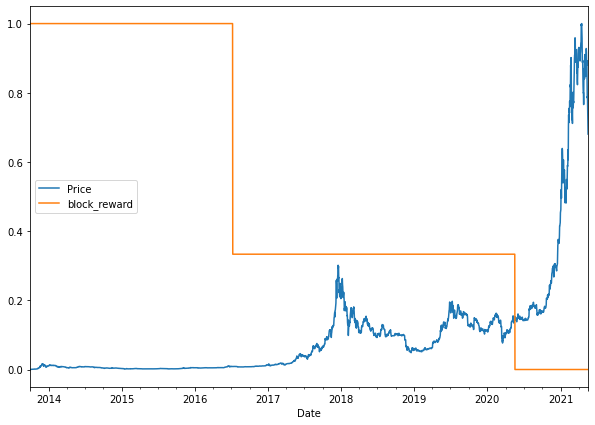

In [ ]:
from sklearn.preprocessing import minmax_scale

scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), columns=bitcoin_prices_block.columns, index=bitcoin_prices_block.index)


scaled_price_block_df.plot(figsize=(10,7))

# Making a windowed dataset with pandas

In [ ]:
# Setup dataset hyperparameters 
HORIZON = 1 
WINDOW_SIZE=7 


In [ ]:
bitcoin_prices_windowed=bitcoin_prices_block.copy()

In [ ]:
#Add windowed column

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"]=bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)  

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# We created a way to window our dataset directly from a pandas dataframe 
# Now we have in the same row window and prices 

# Create X (windows and y (horizon))

X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets usind indexing
split_size=int(len(X)*0.8)
X_train, y_train=X[:split_size],y[:split_size]
X_test, y_test=X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

# Model 6 Dense (multivariate)

In [ ]:
# Make a multivariate model

In [ ]:
model_6=tf.keras.Sequential([layers.Dense(128, activation="relu"),
                             #layers.Dense(128, activation="relu")
                             layers.Dense(HORIZON)], name="model_6_dense_multivariate")
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)]
            )

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 1954.8555INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 1734.6200 - val_loss: 1271.1191
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 359.9636 - val_loss: 1836.7675
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 222.5266INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 222.5266 - val_loss: 1215.1200
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 185.3937INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 184.8817 - val_loss: 1058.5168
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 179.9608INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 178.1187 - val_loss: 995.0116
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 172.8966INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 57ms/step - loss: 174.5969 - val_loss: 990.8204
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 167.1189INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 166.2851 - val_loss: 924.9037
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 159.8672INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 160.0860 - val_loss: 874.6092
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 156.0363 - val_loss: 895.1463
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 149.8575INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 149.8575 - val_loss: 809.0403
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 144.8533INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 144.2509 - val_loss: 783.1421
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 140.2141 - val_loss: 795.4517
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 139.6102 - val_loss: 829.2001
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 133.4620INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 133.4620 - val_loss: 759.6295
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 133.1080INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 131.3798 - val_loss: 716.6685
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 127.9867INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 126.7536 - val_loss: 713.4036
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 124.6217 - val_loss: 736.6628
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 123.9039INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 123.9039 - val_loss: 667.0847
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 122.0822 - val_loss: 692.0282
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 120.4695 - val_loss: 695.7029
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 123.6890INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 124.2597 - val_loss: 655.9279
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 118.4259INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 117.4042 - val_loss: 634.9478
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 117.4666INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 116.6170 - val_loss: 631.4716
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 118.6156INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 117.4323 - val_loss: 620.4847
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 116.3417INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 114.6757 - val_loss: 614.6613
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 115.1176INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 115.1176 - val_loss: 609.2394
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 116.2182INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 116.4259 - val_loss: 605.4542
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 113.0682INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 112.2903 - val_loss: 603.1577
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 112.9534INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 112.9534 - val_loss: 601.5359
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 116.9451INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 116.3052 - val_loss: 596.2538
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7679 - val_loss: 599.7740
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2672 - val_loss: 601.6633
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2901 - val_loss: 628.2498
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 111.4587INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 111.4587 - val_loss: 590.5644
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5345 - val_loss: 591.1542
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 113.1514INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 113.1514 - val_loss: 581.9723
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3977 - val_loss: 595.5006
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 112.0858 - val_loss: 589.7444
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1908 - val_loss: 584.3672
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8785 - val_loss: 587.2944
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 108.8038 - val_loss: 592.3024
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7041 - val_loss: 644.4152
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2251 - val_loss: 654.3560
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8588 - val_loss: 595.6160
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 55ms/step - loss: 112.5734 - val_loss: 573.9453
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8326 - val_loss: 678.5391
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1839 - val_loss: 593.7262
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3130 - val_loss: 626.2597
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2094 - val_loss: 684.7061
Epoch 54/100
17/18 [===========================>..] - ETA: 0s - loss: 113.4383INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 113.5986 - val_loss: 569.2675
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1975 - val_loss: 575.2070
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4700 - val_loss: 819.8484
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 130.7634 - val_loss: 744.8096
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2583 - val_loss: 570.8125
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0891 - val_loss: 602.3456
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 107.6660 - val_loss: 596.9283
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3343 - val_loss: 571.1216
Epoch 62/100
17/18 [===========================>..] - ETA: 0s - loss: 105.7713INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 105.6011 - val_loss: 569.1286
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6157 - val_loss: 589.5788
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1272 - val_loss: 576.3801
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4543 - val_loss: 585.1937
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 107.0291 - val_loss: 588.5547
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1166 - val_loss: 658.3491
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4314 - val_loss: 634.6624
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0706 - val_loss: 610.2491
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 124.4199 - val_loss: 607.6500
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 107.9786 - val_loss: 568.4745
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2482 - val_loss: 575.0289
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 106.7788 - val_loss: 573.4979
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7062 - val_loss: 573.6649
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0542 - val_loss: 568.6586
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3416 - val_loss: 584.2707
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6261 - val_loss: 578.4714
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4739 - val_loss: 587.1695
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 105.6454INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 106.0018 - val_loss: 567.8691
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1418 - val_loss: 568.3765
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 112.5283 - val_loss: 677.6049
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3616 - val_loss: 599.1793
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 106.9533 - val_loss: 570.9308
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8637 - val_loss: 581.2766
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.2887 - val_loss: 616.6028
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7117 - val_loss: 569.5594
Epoch 89/100
16/18 [=========================>....] - ETA: 0s - loss: 100.8570INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 105.6495 - val_loss: 567.0885
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 104.7914 - val_loss: 570.6016
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3826 - val_loss: 574.3117
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1255 - val_loss: 626.9373
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 119.6403 - val_loss: 664.8304
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3821 - val_loss: 602.9725
Epoch 95/100
17/18 [===========================>..] - ETA: 0s - loss: 105.2187INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 106.1157 - val_loss: 566.2842
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4442 - val_loss: 729.9344
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2812 - val_loss: 597.8212
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3021 - val_loss: 583.8563
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9846 - val_loss: 571.6616
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 108.2259 - val_loss: 606.1730


In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 606.1730


606.1729736328125

In [ ]:
model_6=tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)


18/18 [==============================] - 0s 2ms/step - loss: 566.2842


566.2841796875

In [ ]:
#Make predictions
model_6_preds=tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8830.96 , 8752.166, 9019.749, 8770.649, 8721.503, 8715.381,
       8670.688, 8513.89 , 8432.941, 8516.847], dtype=float32)>

In [ ]:
model_6_results=evaluate_preds(y_true=y_test,
                               y_pred=model_6_preds)
model_6_results

{'mae': 566.2842,
 'mape': 2.5420039,
 'mase': 0.99480444,
 'mse': 1163734.4,
 'rmse': 1078.7653}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
WINDOW_SIZE=30

In [ ]:
# Create NBeatblock via subclassing. Because the N_beats does not exist in Tensorflow


class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    
 # Block contains stack of 4 fully connect layers each ahas a RELU activation   

    self.hidden=[tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range (n_layers)]
    
    #Output  of block is a theta layers with linear activation

    self.theta_layer=tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
      x=inputs
      for layer in self.hidden:
        x=layer(x)
      theta=self.theta_layer(x)
      backcast, forecast= theta[:, :self.input_size], theta[:, -self.horizon:]
      return backcast, forecast



In [ ]:


#Let's test our NBeats BLock class

dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW_SIZE,
                                     theta_size=WINDOW_SIZE+HORIZON,
                                     horizon=HORIZON,
                                     n_neurons=128,
                                     n_layers=4)

In [ ]:
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 30), dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]],
      dtype=int32)>

In [ ]:
# Pass dummy inputs to n-beats layer
backcast, forecast= dummy_nbeats_block_layer(dummy_inputs)

print(f"Backcast:{tf.squeeze(backcast.numpy())}")
print(f"Forecast:{tf.squeeze(forecast.numpy())}")

Backcast:[-3.5168958   1.068827   -2.7278378  -4.253784    0.84082866 -0.10376072
 -1.5301285   3.1294923   2.5010257  -2.7894595  -0.21094131  1.1255251
 -0.9330702  -9.107395   -2.9447958  -3.0593762   3.4171734  -4.974932
  0.5356241  -2.8229418   0.15195489 -3.808041   -1.9565479  -0.5372002
  0.73192    -4.253042    1.52477     2.8448675   4.6608114  -1.1626384 ]
Forecast:1.8478965759277344


# Preparing Data for the N-Beats network using tf.data

In [ ]:
# https://arxiv.org/abs/1905.10437


In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
#Add windowed columns

bitcoin_prices_nbeats=bitcoin_prices.copy()

for i in range (WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"]=bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
#Make features and labels
X=bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y=bitcoin_prices_nbeats.dropna()["Price"]

#Maje train and test set

split_size=int(len(X)*0.8)

X_train, y_train=X[:split_size], y[:split_size]
X_test, y_test=X[split_size:],y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
#Make dataset performant through tf.data API

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

#Combine labels and features by zipping together

train_dataset=tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

#Batch and prefetch

BATCH_SIZE=1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

# Setting up hyperparameters for N_BEATS

In [ ]:
# Values from N-BEATS Paper

N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30

INPUT_SIZE=WINDOW_SIZE*HORIZON
THETA_SIZE=INPUT_SIZE+HORIZON

INPUT_SIZE, THETA_SIZE



(7, 8)

# Getting ready for residual connections

In [ ]:
tensor_1=tf.range(10 ) + 10
tensor_2=tf.range(10)

In [ ]:
subtracted=layers.subtract([tensor_1, tensor_2])
added=layers.add([tensor_1, tensor_2])

print( f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


#  Building, compiling and fitting the N_BEATS algorithm

In [ ]:
%%time

tf.random.set_seed(42)
nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name="InitialBlock")
# because we're using the functional API we have to create input layer
stack_input=layers.Input(shape=(INPUT_SIZE), name="stack_input")

#3. Create initial backcast and forecast input
residuals, forecast=nbeats_block_layer(stack_input)

#4. Create stacks of block layers

for i, _ in enumerate(range(N_STACKS-1)): #iterate -1 because we've already created 1 

    # 5. Use the NbeatsBLock to calculate backcast and forecast
    backcast, block_forecast= NBeatsBlock(
                               input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name=f"NBeatsBlock{i}"
    ) (residuals) # pass in the residuals

# 6. Double residual stacking 
    residuals=layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast=layers.add([forecast, block_forecast], name=f"add_{i}")

#7. Put the stack model together 
model_7=tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. COmpile the model with MAE loss

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with early stopping

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                       patience=200,
                                                       restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=100, verbose=1)] )


Epoch 1/5000
3/3 [==============================] - 12s 1s/step - loss: 1680.5603 - val_loss: 14186.7207 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 1s 224ms/step - loss: 3133.1462 - val_loss: 12641.5791 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 129ms/step - loss: 2589.9841 - val_loss: 14858.8086 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 1s 207ms/step - loss: 1962.5881 - val_loss: 1328.3079 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 125ms/step - loss: 2936.1582 - val_loss: 3971.1267 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 126ms/step - loss: 528.1909 - val_loss: 2551.3584 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 126ms/step - loss: 982.2172 - val_loss: 16525.6680 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 126ms/step - loss: 3955.4749 - val_loss: 10731.3252 - lr: 0.0010
Epoch 9/5000
3/3 [=============================

In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 49ms/step - loss: 573.6888


573.6888427734375

In [ ]:
model_7_preds=make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.205 , 8775.911 , 9029.851 , 8747.4795, 8763.693 , 8760.676 ,
       8650.422 , 8495.455 , 8485.324 , 8510.69  ], dtype=float32)>

In [ ]:
model_7_results= evaluate_preds(y_true=y_test, y_pred=model_7_preds)
model_7_results

{'mae': 573.68884,
 'mape': 2.6175942,
 'mase': 1.0078124,
 'mse': 1165245.9,
 'rmse': 1079.4656}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

# Plotting N-BEATS architecture we've created

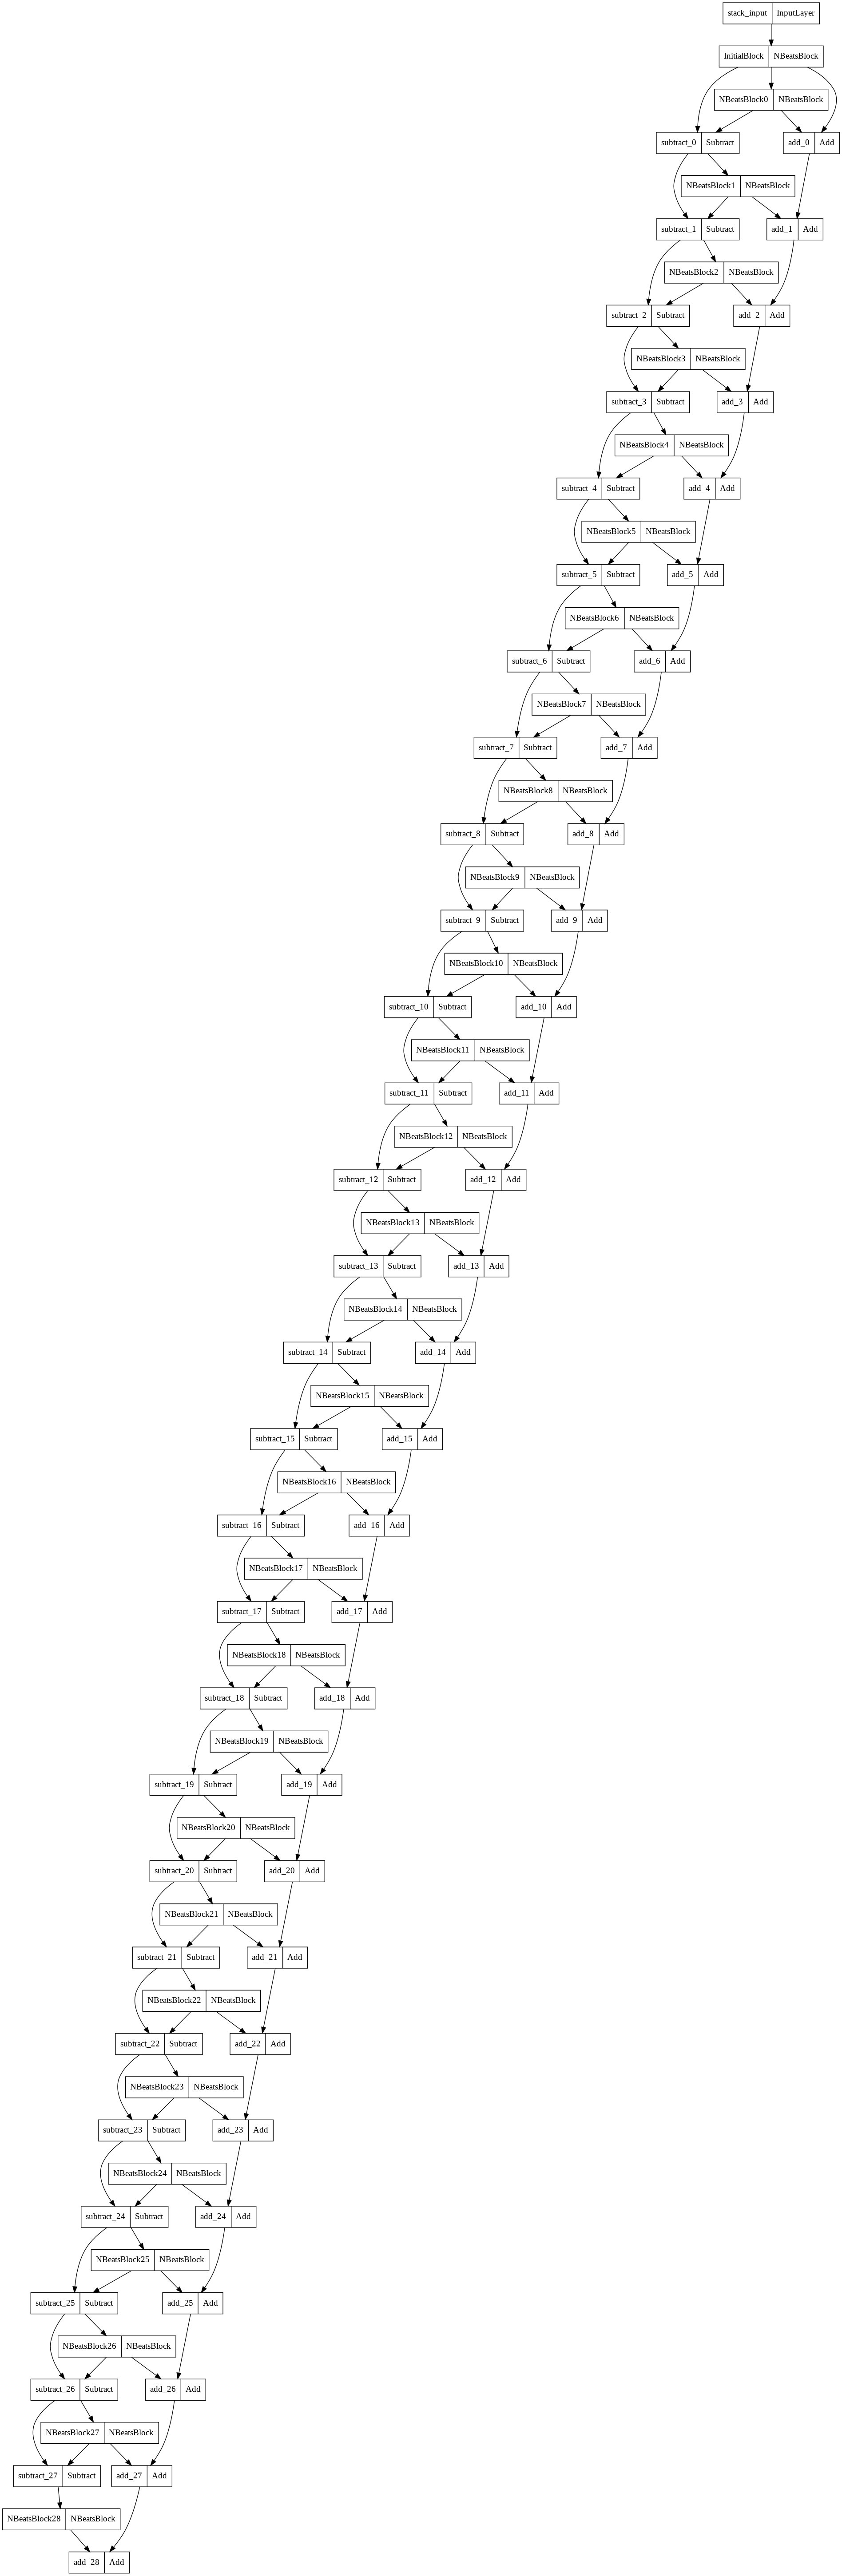

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Model 8: Creating an ensemble (stacking different model together)

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

In [ ]:
## Constructing and fitting an ensemble of models

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fn=["mae","mse","mape"]):
  
  """ Returns a list of num_iter models each trained on MAE, MSE and MAPE LOSS
  """
  ensemble_models=[]

  # Create num_iter number of models per loss function

  for i in range (num_iter):

    for loss_function in loss_fn:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      #Construct a simple model (similar to model 1)
      model=tf.keras.Sequential([
                                 #Initializing weights with normal distribution for estimatin prediction intervals 
                                 layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                                 layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                                 layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss funciton
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae","mse"])
      
      # Fit the current model

      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time 
#get list of trained ensemble models
ensemble_models=get_ensemble_models(num_iter=5,
                                    num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00485: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 00999: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00509: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 00185: ReduceLR

# Make predictions with our ensemble models 

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predicitons

def make_ensemble_preds(ensemble_models, data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))  

In [ ]:
# Create a list ensemble predictions

%%time 
ensemble_preds=make_ensemble_preds(ensemble_models=ensemble_models, data=test_dataset)

CPU times: user 757 ms, sys: 41.6 ms, total: 798 ms
Wall time: 788 ms


In [ ]:
# Evaluate ensemble model predictions 
ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_preds)

In [ ]:
ensemble_mean=tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8794.254 ,  8781.454 ,  9067.114 ,  8730.169 ,  8744.965 ,
        8718.474 ,  8667.094 ,  8481.24  ,  8458.21  ,  8526.813 ,
        8205.4   ,  8106.568 ,  8052.212 ,  7638.633 ,  7286.8726,
        7310.445 ,  7094.424 ,  7217.9507,  7116.9136,  7542.7026,
        7384.3394,  7742.127 ,  7558.025 ,  7388.8906,  7324.1846,
        7313.927 ,  7208.6167,  7390.828 ,  7509.4326,  7541.3286,
        7546.4463,  7328.633 ,  7232.12  ,  7180.397 ,  7189.2744,
        7232.7866,  7082.625 ,  7100.548 ,  6872.3887,  6595.3237,
        7403.956 ,  7176.425 ,  7173.1396,  7264.76  ,  7266.887 ,
        7192.959 ,  7215.5283,  7209.4497,  7179.6123,  7211.172 ,
        7306.984 ,  7385.9233,  7244.733 ,  7168.076 ,  7159.4263,
        6952.7764,  7281.7573,  7335.5166,  7365.2183,  7707.364 ,
        8065.434 ,  8135.7104,  7853.335 ,  8091.981 ,  8099.289 ,
        8174.5566,  8100.327 ,  8745.37  ,  8895.085 ,  8770.111 ,
        8939.0

In [ ]:
# Evaluate ensemble model predictions 
ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_mean)

In [ ]:
ensemble_median=np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8793.002 ,  8790.831 ,  9076.294 ,  8720.317 ,  8754.31  ,
        8725.28  ,  8656.77  ,  8476.1875,  8456.782 ,  8525.501 ,
        8199.041 ,  8106.4033,  8053.9893,  7624.232 ,  7290.227 ,
        7297.3022,  7077.019 ,  7208.7285,  7119.9033,  7543.3247,
        7383.83  ,  7736.049 ,  7562.3887,  7401.842 ,  7327.304 ,
        7310.8545,  7203.2495,  7397.1216,  7497.2314,  7536.135 ,
        7545.27  ,  7331.4346,  7237.907 ,  7181.632 ,  7186.2935,
        7224.7856,  7084.8574,  7103.685 ,  6874.381 ,  6588.3374,
        7397.57  ,  7169.583 ,  7182.628 ,  7271.9175,  7249.403 ,
        7201.4927,  7214.6226,  7209.8286,  7178.4546,  7214.489 ,
        7303.613 ,  7381.917 ,  7251.6445,  7175.033 ,  7162.4087,
        6945.5293,  7283.7446,  7328.336 ,  7363.1655,  7713.801 ,
        8060.249 ,  8132.482 ,  7851.078 ,  8098.019 ,  8099.8564,
        8172.677 ,  8096.4683,  8746.228 ,  8906.222 ,  8765.527 ,
        8951.399 ,  8961.414 ,  8670.354 ,  8634.923 ,  8687.2

In [ ]:
# Evaluate ensemble model predictions 
ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_median)

# Plotting the prediction intervals

In [ ]:
while True: 
  i+=0

In [ ]:
#Find upper and lower bounds of ensemble predictions

def get_upper_lower(preds):

  #measure the standard deviation of the predictions
  std=tf.math.reduce_std(preds, axis=0)

  # multiply the std dev to get the interval by 1.96
  interval=1.96 * std

  #get the prediction interval upper and lower bound
  preds_mean=tf.reduce_mean(preds, axis=0)
  lower, upper=preds_mean - interval, preds_mean + interval 

  return lower, upper

# Get the upper and the lower bounds of the 95% percent prediction interval

lower, upper =get_upper_lower(preds=ensemble_preds)

lower, upper


In [ ]:
len(ensemble_median)

In [ ]:
ensemble_median=np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
#To plot the uppe and lower bounds, let's use fill between

plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);



In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [ ]:
import numpy as np 
def get_future_dates(start_date, into_future, offset=1):

  start_date=start_date+np.timedelta64(offset, "D")
  end_date=start_date+np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep=bitcoin_prices.index[-1]

In [ ]:
next_time_step=get_future_dates(start_date=last_timestep, into_future=14)
next_time_step


array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')